# **Train YOLO-Seg**

In [1]:
import torch

# CUDAが使えるかどうかを確認
cuda_available = torch.cuda.is_available()

if cuda_available:
    print(f"CUDA is available! GPU: {torch.cuda.get_device_name(0)}")
else:
    print("CUDA is not available.")
     

CUDA is available! GPU: Quadro RTX 5000


In [2]:
#環境の確認
import torch
import sys
print(f"Python version: {sys.version}")
print(f"PyTorch version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")
print(f"PyTorch CUDA version: {torch.version.cuda}")

Python version: 3.8.6 (tags/v3.8.6:db45529, Sep 23 2020, 15:52:53) [MSC v.1927 64 bit (AMD64)]
PyTorch version: 2.4.1+cu121
CUDA available: True
PyTorch CUDA version: 12.1


In [4]:
# Inference London-bus image
from ultralytics import RTDETR
import wget
import cv2
import matplotlib.pyplot as plt
import os

# RTDETRモデルのダウンロードと初期化
model_path = r'models\rtdetr-l.pt'

try:
    model = RTDETR(model_path)
except:
    # モデルディレクトリが存在しない場合は作成
    os.makedirs(os.path.dirname(model_path), exist_ok=True)
    
    # モデルをダウンロードして指定したパスに保存
    wget.download('https://github.com/ultralytics/assets/releases/download/v0.0.0/rtdetr-l.pt', model_path)
    model = RTDETR(model_path)

# 推論実行
image_path = 'london-buses.jpg'
results = model(image_path)

# 結果の表示と保存
for r in results:
    # 画像をプロットして表示
    # plt.figure(figsize=(12, 8))
    # plt.imshow(cv2.cvtColor(r.plot(), cv2.COLOR_BGR2RGB))
    # plt.axis('off')
    # #plt.show()
    
    # 結果の保存
    cv2.imwrite('result.jpg', r.plot())


image 1/1 c:\Users\ykita\ROP_AI_project\london-buses.jpg: 640x640 16 persons, 2 cars, 1 bus, 298.2ms
Speed: 7.0ms preprocess, 298.2ms inference, 3.4ms postprocess per image at shape (1, 3, 640, 640)


# **Test new model**


image 1/1 C:\Users\ykita\ROP_AI_project\ROP_project\data\ROP_image\IMG_2025\IMG_2025_0016.jpg: 640x640 1 Lens, 265.6ms
Speed: 18.1ms preprocess, 265.6ms inference, 15.6ms postprocess per image at shape (1, 3, 640, 640)
0 0.555519 0.534940 0.594664 0.338238


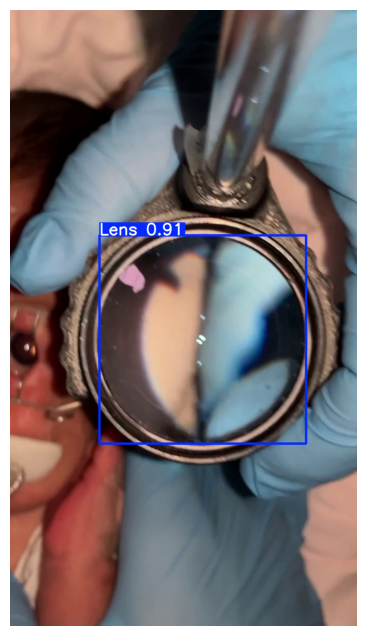

In [3]:
from ultralytics import RTDETR
import cv2
import matplotlib.pyplot as plt

model = RTDETR(r"C:\Users\ykita\ROP_AI_project\ROP_project\models\rtdetr-l-1697_1703.pt")

# 推論実行
image_path = r'C:\Users\ykita\ROP_AI_project\ROP_project\data\ROP_image\IMG_2025\IMG_2025_0016.jpg'
results = model(image_path, save=False)

for r in results:
    boxes = r.boxes  # YOLOv8の場合

    # YOLO形式出力
    for box in boxes:
        cls_id = int(box.cls[0])  # クラスID
        x_center, y_center, width, height = box.xywhn[0]

        # YOLO形式: class x_center y_center width height
        # 小数点以下6桁で出力したい場合
        print(f"{cls_id} {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}")

    #検出結果を画像に描画して表示
    plt.figure(figsize=(12, 8))
    plt.imshow(cv2.cvtColor(r.plot(), cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

    #結果の保存
    cv2.imwrite('result.jpg', r.plot())


In [ ]:
#Web画像のinference

from ultralytics import RTDETR
import wget
import cv2
import matplotlib.pyplot as plt
import requests
from PIL import Image
from io import BytesIO

# モデルが未定義ならロードする
try:
    model  # 変数modelが定義されているか確認
except NameError:
    print("modelが未定義のため、ロードを実行します。")
    model = RTDETR(r"C:\Users\ykita\FacePhoto_instance\models\135best_rtdetr.pt")

# 画像URLの指定
url = "https://365dentist.jp/wp-content/uploads/2023/06/26579868_s.jpg"

# 画像のダウンロード
response = requests.get(url)
img = Image.open(BytesIO(response.content))

# 推論実行
results = model(img)

# 結果の表示と保存
for r in results:
    # 画像をプロットして表示
    plt.figure(figsize=(12, 8))
    plt.imshow(cv2.cvtColor(r.plot(), cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

# **YOLO11-seg トレーニングフォルダ構成**
```
準備する形
project_root/
│
└── data/
    |
    │
    ├── images/ --> データセットから移行
    │   ├── img1.jpg
    │   ├── img2.jpg
    │   └── ...
    │   
    ├── labels/ --> CVATからそのまま移す      　　　
    |       ├── img1.txt
    |       ├── img2.txt
    |       └── ...
    |
    | 
    ├── Train.txt　　　　　　# トレーニングファイルのリスト --> CVATからそのまま移す
    │
    └── dataset.yaml        # データセット設定ファイル  --> 新たに作成




最終形
project_root/
│
└── data/
    |
    │
    ├── train/
    │   ├── images/       # トレーニング用の画像
    │   │   ├── img1.jpg
    │   │   ├── img2.jpg
    │   │   └── ...
    │   │
    │   └── labels/      # トレーニング用のラベル（アノテーション）
    │       ├── img1.txt
    │       ├── img2.txt
    │       └── ...
    │
    ├── val/
    │   ├── images/      # 検証用の画像
    │   │   ├── img1.jpg
    │   │   └── ...
    │   │
    │   └── labels/     # 検証用のラベル
    │       ├── img1.txt
    │       └── ...
    │
    ├── test/           # (オプション) テスト用のデータセット
    |   ├── images/
    |   └── labels/
    │
    ├── Train.txt           # トレーニングファイルのリスト
    │
    └── dataset.yaml        # データセット設定ファイル:
```


## **dataset.yaml**

```
# train and val data as 1) directory: path/images/, 2) file: path/images.txt, or 3) list: [path1/images/, path2/images/]
train: ./data/images/train
val: ./data/images/valid

# number of classes
nc: 3

# class names:
  0: Fundus
  1: Disc
  2: Macula

```

### **円形切り抜きバージョン**

In [ ]:
# # データセットの構造を作成するためのコード
# # 
# # 1. 画像ファイルのコピー元ディレクトリとコピー先ディレクトリを設定
# # 2. 処理対象のディレクトリリストを定義
# # 3. 各ディレクトリに対して以下の処理を実行:
# #   - 新しいディレクトリを作成 (_internalを付加)
# #   - 既存のディレクトリがある場合は削除
# #   - 元の画像ディレクトリから画像を読み込み
# #   - 画像の中心座標を計算
# #   - 画像処理:
# #     * 中心から半径rの円形マスクを作成
# #     * マスク外の領域を(114,114,114)の灰色で塗りつぶし
# #     * 円形領域内の画像のみを残す
# #     * 処理済み画像を新しいディレクトリに保存
# #   - 進捗状況をプログレスバーで表示


# import shutil
# import os
# from tqdm import tqdm

# # コピー元ディレクトリ
# source_images_dir = r'C:\Users\ykita\ROP_AI_project\ROP_project\data\ROP_image'

# # コピー先ディレクトリ
# destination_images_dir = r'C:\Users\ykita\ROP_AI_project\ROP_project\data\ROP_image'

# # 処理対象のディレクトリリスト
# image_dir = ['IMG_1697_lens', ]
# add_argument = "_internal"

# import cv2
# import numpy as np
# import os
# from tqdm import tqdm

# # 各ディレクトリに対して処理を実行
# for dir_name in image_dir:
#     # 新しいディレクトリ名を作成
#     new_dir = dir_name + add_argument
#     new_dir_path = os.path.join(destination_images_dir, new_dir)
    
#     # ディレクトリが存在する場合は削除
#     if os.path.exists(new_dir_path):
#         shutil.rmtree(new_dir_path)
#     # 新規ディレクトリ作成    
#     os.makedirs(new_dir_path)

#     # 元の画像ディレクトリのパス
#     source_dir = os.path.join(source_images_dir, dir_name)
    
#     # ディレクトリ内の全画像に対して処理
#     if os.path.isdir(source_dir):
#         files = os.listdir(source_dir)
#         for file in tqdm(files, desc=f"{dir_name}の処理中"):
#             if file.lower().endswith(('.png', '.jpg', '.jpeg')):
#                 # 画像読み込み
#                 img_path = os.path.join(source_dir, file)
#                 img = cv2.imread(img_path)
                
#                 if img is not None:
#                     height, width = img.shape[:2]
                    
#                     # 画像の中心座標を計算
#                     center_x = width // 2
#                     center_y = height // 2
                    
#                     # 縦横比チェック
#                     aspect_ratio = height / width
#                     if 0.8 <= aspect_ratio <= 1.2:
#                         # マスク作成
#                         mask = np.zeros((height, width), dtype=np.uint8)
#                         radius = min(height, width) // 2
#                         cv2.circle(mask, (center_x, center_y), radius, 255, -1)
                        
#                         # マスク適用
#                         result = img.copy()
#                         result[mask == 0] = (114, 114, 114)  # 黒から灰色に変更
                        
#                         # 処理済み画像を保存
#                         output_path = os.path.join(new_dir_path, file)
#                         cv2.imwrite(output_path, result)


IMG_1697_lensの処理中:   0%|          | 0/1035 [00:00<?, ?it/s]

IMG_1697_lensの処理中: 100%|██████████| 1035/1035 [00:29<00:00, 34.54it/s]


In [ ]:
# このスクリプトは、指定されたディレクトリ内のラベルファイルと画像ファイルを
# 以下のようにコピーします：
#
# 1. source_labels_dir/LABELS_xxxx/ 内の全ファイル → destination_labels_dir/
# 2. source_images_dir/IMG_xxxx/ 内の全ファイル → destination_images_dir/
#
# 処理対象のディレクトリは、label_dirとimage_dirのリストで指定します。
# 各ディレクトリ内のファイルは全て、指定された出力先ディレクトリにコピーされます。
# tqdmを使用して、コピーの進捗状況をプログレスバーで表示します。

import shutil
import os
from tqdm import tqdm

# コピー元ディレクトリ
source_labels_dir = r'C:\Users\ykita\ROP_AI_project\ROP_project\data\ROP_image'
source_images_dir = r'C:\Users\ykita\ROP_AI_project\ROP_project\data\ROP_image'

# コピー先ディレクトリ
destination_labels_dir = r'C:\Users\ykita\ROP_AI_project\ROP_project\data\train\labels'
destination_images_dir = r'C:\Users\ykita\ROP_AI_project\ROP_project\data\train\images'

# 処理対象のディレクトリリスト（IMG_*_lens_internalとLABELS_*_lens_segが両方存在する組み合わせ）
label_dir = ['LABELS_mytemp2_lens_seg','LABELS_mytemp2-2_lens_seg','LABELS_0573_lens_seg', 'LABELS_1698_lens_seg', 'LABELS_1699_lens_seg', 'LABELS_1700_lens_seg', 'LABELS_1702_lens_seg', 'LABELS_1703_lens_seg', 'LABELS_1731_lens_seg', 'LABELS_1735_lens_seg', 'LABELS_1891_lens_seg', 'LABELS_1899_lens_seg', 'LABELS_1902_lens_seg', 'LABELS_1965_lens_seg', 'LABELS_1968_lens_seg', 'LABELS_2025_lens_seg', 'LABELS_2118_lens_seg', 'LABELS_2123_lens_seg']
image_dir = ['mytemp2_lens_internal','mytemp2-2_lens_internal','IMG_0573_lens_internal', 'IMG_1698_lens_internal', 'IMG_1699_lens_internal', 'IMG_1700_lens_internal', 'IMG_1702_lens_internal', 'IMG_1703_lens_internal',  'IMG_1731_lens_internal', 'IMG_1735_lens_internal', 'IMG_1891_lens_internal', 'IMG_1899_lens_internal', 'IMG_1902_lens_internal', 'IMG_1965_lens_internal', 'IMG_1968_lens_internal', 'IMG_2025_lens_internal', 'IMG_2118_lens_internal', 'IMG_2123_lens_internal']


# destination_labels_dirとdestination_images_dirが存在する場合は削除し、新規作成する
if os.path.exists(destination_labels_dir):
    shutil.rmtree(destination_labels_dir)
os.makedirs(destination_labels_dir, exist_ok=True)

if os.path.exists(destination_images_dir):
    shutil.rmtree(destination_images_dir)
os.makedirs(destination_images_dir, exist_ok=True)

# ラベルファイルのコピー
for label_folder in tqdm(label_dir, desc="ラベルファイルのコピー中"):
    source_folder = os.path.join(source_labels_dir, label_folder)
    # フォルダ内の全ファイルを取得
    if os.path.isdir(source_folder):
        files = os.listdir(source_folder)
        for file in files:
            src = os.path.join(source_folder, file)
            dst = os.path.join(destination_labels_dir, file)
            shutil.copy(src, dst)
            print(f"コピーしました: {src} -> {dst}")

# 画像ファイルのコピー
for image_folder in tqdm(image_dir, desc="画像ファイルのコピー中"):
    source_folder = os.path.join(source_images_dir, image_folder)
    # フォルダ内の全ファイルを取得
    if os.path.isdir(source_folder):
        files = os.listdir(source_folder)
        for file in files:
            src = os.path.join(source_folder, file)
            dst = os.path.join(destination_images_dir, file)
            shutil.copy(src, dst)
            print(f"コピーしました: {src} -> {dst}")

In [ ]:
# #segmentationはcvatのラベルが1スタートなので、0スタートに修正
# #TaskからのDLだと修正不要？？？
# """
# # ラベルインデックス調整スクリプト
# # 目的：YOLOフォーマットのアノテーションファイルのラベルインデックスを1始まりから0始まりに変更
# # 対象：指定されたディレクトリ内のすべての.txtファイル
# # 
# # 入力ファイルの例：
# # 1 0.399550 0.361382 0.482096 0.225870 ...  # ラベル1で始まる
# # 2 0.452748 0.391491 0.488882 0.403540 ...  # ラベル2で始まる
# #
# # 出力ファイルの例：
# # 0 0.399550 0.361382 0.482096 0.225870 ...  # ラベル0に変更
# # 1 0.452748 0.391491 0.488882 0.403540 ...  # ラベル1に変更
# #
# # 使用方法：
# # 1. ラベルファイルが含まれているディレクトリパスを設定
# # 2. スクリプトを実行すると、すべての.txtファイルを処理
# # 3. 元のファイルが直接更新されます
# #
# # 注意：元のファイルが直接更新されるため、実行前にファイルのバックアップを
# # 取ることをお勧めします
# """

# import os
# from pathlib import Path

# def adjust_labels(input_path):
#     """
#     ラベルファイルを読み込み、すべてのラベルインデックスを1減らします
#     （1始まりから0始まりに変更）。
#     元のファイルを調整後の内容で上書きします。
    
#     引数：
#         input_path (str): 入力ラベルファイルのパス
#     """
#     # 元のファイル内容を読み込み
#     with open(input_path, 'r') as f:
#         lines = f.readlines()
    
#     adjusted_lines = []
#     for line in lines:
#         parts = line.strip().split()
#         if parts:  # 空行をスキップ
#             # ラベル（最初の数字）を1減らす
#             adjusted_line = f"{int(parts[0]) - 1} {' '.join(parts[1:])}"
#             adjusted_lines.append(adjusted_line)
    
#     # 同じファイルに書き戻す
#     with open(input_path, 'w') as f:
#         f.write('\n'.join(adjusted_lines))

# def process_directory(directory_path):
#     """
#     指定されたディレクトリ内のすべての.txtファイルを処理します。
    
#     引数：
#         directory_path (str): ラベルファイルを含むディレクトリのパス
#     """
#     directory = Path(directory_path)
#     txt_files = list(directory.glob('*.txt'))
#     total_files = len(txt_files)
    
#     print(f"{directory_path} 内で {total_files} 個の.txtファイルが見つかりました")
    
#     for i, file_path in enumerate(txt_files, 1):
#         try:
#             adjust_labels(str(file_path))
#             print(f"処理完了 [{i}/{total_files}]: {file_path.name}")
#         except Exception as e:
#             print(f"エラーが発生しました {file_path.name}: {str(e)}")

# # ディレクトリパス
# labels_dir = r'C:\Users\ykita\ROP_AI_project\ROP_project\data\train\labels'


# # ディレクトリ内のすべてのファイルを処理
# process_directory(labels_dir)
# print("\n処理が完了しました！")

In [27]:
# データの前処理
# 目的: 画像ファイルとラベルファイルの対応関係を確認
# 処理内容:
# 1. ラベルディレクトリとイメージディレクトリのパスを設定
# 2. 各ディレクトリからファイル名(拡張子なし)を取得
# 3. ラベルが存在しない画像ファイルを特定
# 4. 不一致の数を表示

import os

# ラベルとイメージのディレクトリパス
labels_dir = r'C:\Users\ykita\ROP_AI_project\ROP_project\data\train\labels'
images_dir = r"C:\Users\ykita\ROP_AI_project\ROP_project\data\train\images"


# ラベルファイルの basename (拡張子なし) を取得
label_files = {os.path.splitext(f)[0] for f in os.listdir(labels_dir) if f.endswith('.txt')}

# 画像ファイルの basename (拡張子なし) を取得
image_files = {os.path.splitext(f)[0] for f in os.listdir(images_dir) if f.endswith('.jpg')}

# ラベルが存在しない画像ファイルを見つける
images_without_labels = image_files - label_files

# 結果を表示
print(f"ラベルが存在しない画像ファイルの数: {len(images_without_labels)}")

ラベルが存在しない画像ファイルの数: 8385


In [19]:
# Detectionの場合は
# ラベルが存在しない画像ファイルを削除
# for img_name in images_without_labels:
#     img_path = os.path.join(images_dir, img_name + '.jpg')
#     try:
#         os.remove(img_path)
#         print(f"削除しました: {img_path}")
#     except OSError as e:
#         print(f"削除に失敗しました {img_path}: {e}")

# print("不一致ファイルの削除が完了しました")

In [28]:
# Segmentationの場合は
# 画像が存在しないlabelファイルに空のtxtを割り当て
import os

# ディレクトリのパス
labels_dir = r'C:\Users\ykita\ROP_AI_project\ROP_project\data\train\labels'
images_dir = r"C:\Users\ykita\ROP_AI_project\ROP_project\data\train\images"

# ラベルファイルの basename (拡張子なし) を取得
label_files = {os.path.splitext(f)[0] for f in os.listdir(labels_dir) if f.endswith('.txt')}
print(f"label_files: {label_files}")
print(f"len(label_files): {len(label_files)}")

# 画像ファイルの basename (拡張子なし) を取得
image_files = {os.path.splitext(f)[0] for f in os.listdir(images_dir) if f.endswith('.jpg')}
print(f"image_files: {image_files}")
print(f"len(image_files): {len(image_files)}")

# ラベルが存在しない画像ファイルを見つける
labels_without_labels = image_files - label_files
print(labels_without_labels)

# 空のテキストファイルを割り当て
for label in labels_without_labels:
    label_path = os.path.join(labels_dir, label + '.txt')
    with open(label_path, 'w') as f:
        pass  # 空のファイルを作成
    print(f"空のテキストファイルを作成しました: {label_path}")

label_files: {'IMG_1899_0773', 'mytemp2_2_0762', 'IMG_2123_0133', 'IMG_1731_0221', 'mytemp2_0402', 'IMG_2123_0309', 'IMG_1891_0125', 'mytemp2_0400', 'IMG_1731_0249', 'IMG_1965_2506', 'IMG_1703_0453', 'IMG_1735_0251', 'IMG_1702_0916', 'mytemp2_0373', 'IMG_1965_2016', 'IMG_1965_0839', 'IMG_2118_1512', 'IMG_1698_0143', 'IMG_1899_0414', 'IMG_1902_0296', 'IMG_1965_1498', 'IMG_2025_0575', 'IMG_2123_0220', 'IMG_1965_2998', 'IMG_0573_0159', 'IMG_1702_0188', 'IMG_1700_0314', 'IMG_2025_0462', 'IMG_0573_1246', 'IMG_1700_1513', 'mytemp2_0084', 'mytemp2_2_1183', 'mytemp2_1595', 'IMG_1698_0464', 'IMG_2118_1492', 'IMG_1968_0520', 'mytemp2_0721', 'IMG_1965_0755', 'IMG_1965_2081', 'IMG_0573_0441', 'IMG_1702_0318', 'IMG_0573_1051', 'IMG_1703_0213', 'mytemp2_2_1334', 'IMG_1703_0339', 'mytemp2_1307', 'IMG_1965_0548', 'IMG_0573_0405', 'IMG_1702_1227', 'IMG_1968_0196', 'IMG_1698_0366', 'IMG_0573_0426', 'IMG_1702_0287', 'IMG_0573_0871', 'mytemp2_1212', 'mytemp2_0477', 'IMG_1965_3084', 'IMG_2118_1643', 'mytem

In [29]:
# 1. 指定されたディレクトリから画像ファイル(.jpg, .png, .tif)を取得
# 2. 症例数（グループ数）をカウント
# 3. 10症例以上の場合：Group + Stratified Splitを適用
# 4. 10症例未満の場合：Stratified Splitのみを適用
# 5. train/validディレクトリを作成
# 6. データを8:2の比率で分割
# 7. 画像ファイルと対応するラベルファイル(.txt)を適切なディレクトリに移動

import os
import shutil
from tqdm import tqdm
from sklearn.model_selection import StratifiedShuffleSplit

# データディレクトリのパス設定
data_img_dir = r'C:\Users\ykita\ROP_AI_project\ROP_project\data\train\images'
data_label_dir = r'C:\Users\ykita\ROP_AI_project\ROP_project\data\train\labels'
src_img_dir = r"C:\Users\ykita\ROP_AI_project\ROP_project\data\train\images"
src_label_dir = r'C:\Users\ykita\ROP_AI_project\ROP_project\data\train\labels'



# ソースディレクトリの画像ファイルを直接取得（サブディレクトリを除く）
image_files = [f for f in os.listdir(src_img_dir) 
               if f.lower().endswith(('.jpg', '.jpeg', '.png', '.tif', '.tiff')) 
               and os.path.isfile(os.path.join(src_img_dir, f))]

if not image_files:
    print("エラー: 画像ファイルが見つかりません")
else:
    print(f"見つかった画像ファイル数: {len(image_files)}")
    
    # ファイル名からグループID（症例ID）を抽出する関数
    # 例: IMG_1698_0001.jpg -> IMG_1698
    def get_group_id(filename):
        parts = filename.split('_')
        if len(parts) >= 2:
            return f"{parts[0]}_{parts[1]}"
        return filename.split('_')[0] if '_' in filename else filename
    
    # ラベルファイルが空かどうかを判定する関数
    def is_empty_label(label_path):
        if not os.path.exists(label_path):
            return True
        try:
            with open(label_path, 'r', encoding='utf-8') as f:
                content = f.read().strip()
                return len(content) == 0
        except:
            return True
    
    # グループIDとラベル状態を取得
    groups = [get_group_id(f) for f in image_files]
    label_states = []
    for img_file in image_files:
        label_file = os.path.splitext(img_file)[0] + '.txt'
        label_path = os.path.join(src_label_dir, label_file)
        label_states.append('empty' if is_empty_label(label_path) else 'annotated')
    
    # ユニークなグループ数をカウント
    unique_groups = set(groups)
    num_groups = len(unique_groups)
    print(f"症例数（グループ数）: {num_groups}")
    print(f"空ラベル数: {label_states.count('empty')}")
    print(f"アノテーションあり数: {label_states.count('annotated')}")
    
    # train/validディレクトリの作成
    for split in ['train', 'valid']:
        img_split_dir = os.path.join(data_img_dir, split)
        label_split_dir = os.path.join(data_label_dir, split)
        
        os.makedirs(img_split_dir, exist_ok=True)
        os.makedirs(label_split_dir, exist_ok=True)

    # データの分割
    if num_groups >= 10:
        print("10症例以上なので、Group + Stratified Splitを適用します")
        # Group + Stratified Split
        # 各グループを空/非空で分類し、グループ単位でstratified split
        group_empty_count = {}
        group_annotated_count = {}
        group_files_dict = {}
        
        for i, (img_file, group_id, label_state) in enumerate(zip(image_files, groups, label_states)):
            if group_id not in group_files_dict:
                group_files_dict[group_id] = []
                group_empty_count[group_id] = 0
                group_annotated_count[group_id] = 0
            group_files_dict[group_id].append(img_file)
            if label_state == 'empty':
                group_empty_count[group_id] += 1
            else:
                group_annotated_count[group_id] += 1
        
        # グループを空/非空の比率で分類
        group_labels = []
        group_list = list(unique_groups)
        for group_id in group_list:
            total = group_empty_count[group_id] + group_annotated_count[group_id]
            empty_ratio = group_empty_count[group_id] / total if total > 0 else 0
            # 空ラベルの割合でグループを分類（閾値50%）
            group_labels.append('empty_dominant' if empty_ratio >= 0.5 else 'annotated_dominant')
        
        # グループ単位でstratified split
        sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
        train_group_idx, valid_group_idx = next(sss.split(group_list, group_labels))
        
        train_groups = [group_list[i] for i in train_group_idx]
        valid_groups = [group_list[i] for i in valid_group_idx]
        
        # 各グループのファイルをtrain/validに割り当て
        train_files = []
        valid_files = []
        for group_id in train_groups:
            train_files.extend(group_files_dict[group_id])
        for group_id in valid_groups:
            valid_files.extend(group_files_dict[group_id])
        
    else:
        print("10症例未満なので、Stratified Splitのみを適用します")
        # Stratified Splitのみ
        sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
        train_idx, valid_idx = next(sss.split(image_files, label_states))
        
        train_files = [image_files[i] for i in train_idx]
        valid_files = [image_files[i] for i in valid_idx]

    # ファイルの移動関数
    def move_files(files, split):
        for img_file in tqdm(files, desc=f"{split}データの移動"):
            try:
                # 画像ファイルの移動
                src_img_path = os.path.join(src_img_dir, img_file)
                dst_img_path = os.path.join(data_img_dir, split, img_file)
                
                if os.path.exists(src_img_path):
                    shutil.move(src_img_path, dst_img_path)

                # 対応するラベルファイルの移動
                label_file = os.path.splitext(img_file)[0] + '.txt'
                src_label_path = os.path.join(src_label_dir, label_file)
                dst_label_path = os.path.join(data_label_dir, split, label_file)
                
                if os.path.exists(src_label_path):
                    shutil.move(src_label_path, dst_label_path)

            except Exception as e:
                print(f"エラーが発生しました ({img_file}): {str(e)}")

    # trainとvalidそれぞれにファイルを移動
    move_files(train_files, 'train')
    move_files(valid_files, 'valid')

    # 分割結果の統計を表示
    train_empty = sum(1 for f in train_files if is_empty_label(
        os.path.join(src_label_dir, os.path.splitext(f)[0] + '.txt')))
    train_annotated = len(train_files) - train_empty
    
    valid_empty = sum(1 for f in valid_files if is_empty_label(
        os.path.join(src_label_dir, os.path.splitext(f)[0] + '.txt')))
    valid_annotated = len(valid_files) - valid_empty
    
    print(f"\n=== 分割結果 ===")
    print(f"訓練データ数: {len(train_files)} (空: {train_empty}, アノテーションあり: {train_annotated})")
    print(f"検証データ数: {len(valid_files)} (空: {valid_empty}, アノテーションあり: {valid_annotated})")
    if len(train_files) > 0:
        print(f"訓練データの空ラベル割合: {train_empty/len(train_files)*100:.2f}%")
    if len(valid_files) > 0:
        print(f"検証データの空ラベル割合: {valid_empty/len(valid_files)*100:.2f}%")
    print("データの分割と移動が完了しました")

見つかった画像ファイル数: 20502
症例数（グループ数）: 1650
空ラベル数: 8385
アノテーションあり数: 12117
10症例以上なので、Group + Stratified Splitを適用します


validデータの移動: 100%|██████████| 4023/4023 [00:07<00:00, 522.98it/s]



=== 分割結果 ===
訓練データ数: 16479 (空: 16479, アノテーションあり: 0)
検証データ数: 4023 (空: 4023, アノテーションあり: 0)
訓練データの空ラベル割合: 100.00%
検証データの空ラベル割合: 100.00%
データの分割と移動が完了しました


In [30]:
import os

# ディレクトリのパス
train_images_dir = r'C:\Users\ykita\ROP_AI_project\ROP_project\data\train\images\train'
train_labels_dir = r'C:\Users\ykita\ROP_AI_project\ROP_project\data\train\labels\train'
val_images_dir = r'C:\Users\ykita\ROP_AI_project\ROP_project\data\train\images\valid'
val_labels_dir = r'C:\Users\ykita\ROP_AI_project\ROP_project\data\train\labels\valid'

# 対応の確認と削除
def check_and_remove_unmatched_files(images_dir, labels_dir):
    image_files = set(os.path.splitext(f)[0] for f in os.listdir(images_dir) if f.endswith('.jpg'))
    label_files = set(os.path.splitext(f)[0] for f in os.listdir(labels_dir) if f.endswith('.txt'))

    unmatched_images = image_files - label_files
    unmatched_labels = label_files - image_files

    # 対応のない画像ファイルを削除
    for image in unmatched_images:
        image_path = os.path.join(images_dir, image + '.jpg')
        if os.path.exists(image_path):
            print(f"画像ファイル {image_path} に対応するラベルがありません。削除しますか？ (y/n): ", end="")
            if input().strip().lower() == 'y':
                os.remove(image_path)
                print(f"{image_path} を削除しました。")

    # 対応のないラベルファイルを削除
    for label in unmatched_labels:
        label_path = os.path.join(labels_dir, label + '.txt')
        if os.path.exists(label_path):
            print(f"ラベルファイル {label_path} に対応する画像がありません。削除しますか？ (y/n): ", end="")
            if input().strip().lower() == 'y':
                os.remove(label_path)
                print(f"{label_path} を削除しました。")

# 訓練データと検証データの対応確認
check_and_remove_unmatched_files(train_images_dir, train_labels_dir)
check_and_remove_unmatched_files(val_images_dir, val_labels_dir)

In [31]:
import os

def count_files_in_directory(directory):
    """指定されたディレクトリ内のファイル数をカウントする"""
    if not os.path.exists(directory):
        return 0
    return len([f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))])

# データディレクトリのパス
base_path = r"C:\Users\ykita\ROP_AI_project\ROP_project\data\train"

# 各ディレクトリのパス
train_images_path = os.path.join(base_path, "images", "train")
valid_images_path = os.path.join(base_path, "images", "valid")
train_labels_path = os.path.join(base_path, "labels", "train")
valid_labels_path = os.path.join(base_path, "labels", "valid")

# ファイル数をカウント
train_images_count = count_files_in_directory(train_images_path)
valid_images_count = count_files_in_directory(valid_images_path)
train_labels_count = count_files_in_directory(train_labels_path)
valid_labels_count = count_files_in_directory(valid_labels_path)

# 結果を表示
print("=== ファイル数チェック結果 ===")
print(f"Train Images: {train_images_count} files")
print(f"Train Labels: {train_labels_count} files")
print(f"Valid Images: {valid_images_count} files")
print(f"Valid Labels: {valid_labels_count} files")

print("\n=== 一致チェック ===")
train_match = train_images_count == train_labels_count
valid_match = valid_images_count == valid_labels_count

if train_match:
    print("✓ Train: 画像とラベルのファイル数が一致しています")
else:
    print(f"✗ Train: 画像とラベルのファイル数が一致していません (差: {abs(train_images_count - train_labels_count)})")

if valid_match:
    print("✓ Valid: 画像とラベルのファイル数が一致しています")
else:
    print(f"✗ Valid: 画像とラベルのファイル数が一致していません (差: {abs(valid_images_count - valid_labels_count)})")

if train_match and valid_match:
    print("\n🎉 すべてのディレクトリでファイル数が一致しています！")
else:
    print("\n⚠️  一部のディレクトリでファイル数が一致していません。")

=== ファイル数チェック結果 ===
Train Images: 16479 files
Train Labels: 16479 files
Valid Images: 4023 files
Valid Labels: 4023 files

=== 一致チェック ===
✓ Train: 画像とラベルのファイル数が一致しています
✓ Valid: 画像とラベルのファイル数が一致しています

🎉 すべてのディレクトリでファイル数が一致しています！


### **YAMLファイルを作成 (for training)**

In [32]:
import yaml
import os

# data = {
#     'train': r'C:\Users\ykita\ROP_AI_project\data\images\train',
#     'val': r'C:\Users\ykita\ROP_AI_project\data\images\valid',
#     'nc': 1,
#     'names': {
#         0: 'Lens',
#     }
# }

data = {
    'train': r'C:\Users\ykita\ROP_AI_project\ROP_project\data\train\images\train',
    'val': r'C:\Users\ykita\ROP_AI_project\ROP_project\data\train\images\valid',
    'nc': 3,
    'names': {
        0: 'Fundus',
        1: 'Disc',
        2: 'Macula',
    }
}

yaml_path = r'C:\Users\ykita\ROP_AI_project\ROP_project\data\train\data.yaml'

# dataディレクトリが存在しない場合は作成
os.makedirs('data', exist_ok=True)

# ファイルの存在確認
if os.path.exists(yaml_path):
    print(f"既存の {yaml_path} を上書きします。")
else:
    print(f"新規に {yaml_path} を作成します。")

# YAMLファイルの書き出し（既存ファイルは上書き）
with open(yaml_path, 'w', encoding='utf-8') as f:
    yaml.safe_dump(data, f, sort_keys=False, allow_unicode=True)

print("処理が完了しました。")

新規に C:\Users\ykita\ROP_AI_project\ROP_project\data\train\data.yaml を作成します。
処理が完了しました。


# **Train YOLO11-seg**

In [ ]:
from ultralytics import RTDETR
from ultralytics import YOLO
import wget

# RTDETRモデルのダウンロードと初期化
try:
    #model = RTDETR('rtdetr-l.pt')
    # model = YOLO("yolo11lpt")  # load a pretrained model (recommended for training)
    model = YOLO("yolo11n-seg.pt")  # load a pretrained model (recommended for training)
except:
    #wget.download('https://github.com/ultralytics/assets/releases/download/v0.0.0/rtdetr-l.pt')
    #model = RTDETR('rtdetr-l.pt')
    wget.download('https://github.com/ultralytics/assets/releases/download/v8.3.0/yolo11l.pt')
    model = YOLO("yolo11l.pt")  # load a pretrained model (recommended for training)
    # wget.download('https://github.com/ultralytics/assets/releases/download/v8.3.0/yolo11m-seg.pt')
    # model = YOLO(r"C:\Users\ykita\ROP_AI_project\runs\segment\train9\weights\last.pt")  # load a pretrained model (recommended for training)
    
# Fine-tune
results = model.train(data=r'C:\Users\ykita\ROP_AI_project\ROP_project\data\train\data.yaml', epochs=1000, patience=100,  mask_ratio=1, batch=8, imgsz=640, device=0, degrees=180, flipud=0.5, fliplr=0.5)

In [ ]:
from ultralytics import RTDETR
from ultralytics import YOLO
import wget

# load a partially trained model
model = YOLO(r"C:\Users\ykita\ROP_AI_project\runs\segment\train14\weights\last.pt")  # load a pretrained model (recommended for training)
#results = model.train(resume=True)
results = model.train(resume=True, workers=0, amp=False) #workers=0, amp=falseでバグを回避



New https://pypi.org/project/ultralytics/8.3.166 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.59  Python-3.8.6 torch-2.4.1+cu121 CUDA:0 (Quadro RTX 5000, 16384MiB)
engine\trainer: task=segment, mode=train, model=C:\Users\ykita\ROP_AI_project\runs\segment\train14\weights\last.pt, data=data\data.yaml, epochs=1000, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train14, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=C:\Users\ykita\ROP_AI_project\runs\segment\train14\weights\last.pt, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=Fa

train: Scanning C:\Users\ykita\ROP_AI_project\data\labels\train.cache... 1716 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1716/1716 [00:00<?, ?it/s]
val: Scanning C:\Users\ykita\ROP_AI_project\data\labels\valid.cache... 430 images, 0 backgrounds, 0 corrupt: 100%|██████████| 430/430 [00:00<?, ?it/s]


Plotting labels to runs\segment\train14\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 115 weight(decay=0.0), 126 weight(decay=0.0005), 125 bias(decay=0.0)
Resuming training C:\Users\ykita\ROP_AI_project\runs\segment\train14\weights\last.pt from epoch 190 to 1000 total epochs
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\segment\train14
Starting training for 1000 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   190/1000      5.36G     0.6892      1.228     0.4026      1.085         21        640: 100%|██████████| 215/215 [05:31<00:00,  1.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:41<00:00,  1.53s/it]

                   all        430        828      0.937      0.916      0.947      0.726      0.934      0.907      0.939      0.714



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   191/1000      5.34G     0.7485      1.314     0.4279      1.119         28        640:  53%|█████▎    | 114/215 [03:11<02:49,  1.68s/it]


KeyboardInterrupt: 